# IMAGE CLASSIFICATION (PYTORCH)
pytorch's torchvision package has dataloaders for common datasets like ImageNet, CIFAR-10, MNIST, etc. torchvision.datasets and datatransformers for images torch.utils.data.DataLoader

Here we are using the CIFAR10 dataset that contains 10 classes of 32X32 RGB images. \
The output of torchvision datasets are PIL images of range [0,1] which is then normalized into tensors with range[-1,1]

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#this is image datagenerator in keras. Here we are converitng the image into tensors and then nomralizing the value of the pixel
#it takes in a PIL image and returns a transformed version

In [3]:
#loading the dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train =True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)  #for putting our data into batches
testset = torchvision.datasets.CIFAR10(root="./data", train =False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
#define the classes
classes = ('plane','car','bird','cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## DATA VISUALIZATION

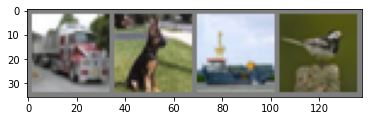

truck   dog  ship  bird


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))    #as here the image is stored as channel, height, width but what we want is height, width, channel
    plt.show()

#getting some random images
data_iter = iter(trainloader)
images, labels = data_iter.next()

#show image
imshow(torchvision.utils.make_grid(images))

#printing label
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

## CONVOLUTIONAL NEURAL NETWORK


Input channel is Conv2d=3 for RGB and 1 for gray scale, out_channel is the number of filters that we apply

In [6]:
class CIFARmodel(nn.Module):
    
    def __init__(self):
        super(CIFARmodel,self).__init__()
        
        #input is 32X32 and the padding is 2 for same padding
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        #16X16 feature map
        self.conv2 = nn.Conv2d(32, 64 , 5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride = 2)
        #feature map size is 9X9
        self.fc1 = nn.Linear(64*8*8,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0),-1) #flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)
    
model = CIFARmodel()
model


CIFARmodel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

model.parameters returns all weights and bias

In [7]:
for p in model.parameters(): 
    print(p.size())

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([128, 4096])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


## Define loss function and optimizer

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

## Train the model

In [9]:
dataiter = iter(trainloader)
images, label = dataiter.next()
print(images)

tensor([[[[ 0.1608,  0.0824, -0.0353,  ..., -0.6000, -0.5529, -0.4745],
          [ 0.1686,  0.0902, -0.0275,  ..., -0.6000, -0.6157, -0.5373],
          [ 0.1765,  0.0902, -0.0275,  ..., -0.4667, -0.4824, -0.5294],
          ...,
          [-0.0431, -0.1529, -0.2549,  ...,  0.4824,  0.2863, -0.0275],
          [-0.1294, -0.1451, -0.2078,  ...,  0.4980,  0.2549, -0.1373],
          [-0.0118, -0.0196, -0.1294,  ...,  0.4980,  0.2706, -0.2078]],

         [[ 0.1294,  0.0588, -0.0588,  ..., -0.4745, -0.4118, -0.3569],
          [ 0.1373,  0.0510, -0.0588,  ..., -0.4902, -0.4745, -0.4196],
          [ 0.1373,  0.0510, -0.0588,  ..., -0.3647, -0.3490, -0.4118],
          ...,
          [ 0.0275,  0.0275, -0.0118,  ...,  0.5451,  0.3569,  0.1137],
          [-0.0510,  0.0510,  0.0510,  ...,  0.5608,  0.3176,  0.0118],
          [ 0.0745,  0.1843,  0.1373,  ...,  0.5529,  0.3255, -0.0745]],

         [[ 0.1059,  0.0196, -0.1216,  ..., -0.3725, -0.3020, -0.2627],
          [ 0.1059,  0.0118, -

In [21]:
for epoch in range(4):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, targets = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        #output
        running_loss+=loss.item()
        if i%1000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print("FINISHED")

C:\Users\shruti\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 0.001
[1,  1001] loss: 1.153
[1,  2001] loss: 1.152
[1,  3001] loss: 1.153
[1,  4001] loss: 1.152
[1,  5001] loss: 1.153
[1,  6001] loss: 1.153
[1,  7001] loss: 1.152
[1,  8001] loss: 1.152
[1,  9001] loss: 1.153
[1, 10001] loss: 1.153
[1, 11001] loss: 1.153
[1, 12001] loss: 1.153
[2,     1] loss: 0.001
[2,  1001] loss: 1.152
[2,  2001] loss: 1.153
[2,  3001] loss: 1.153
[2,  4001] loss: 1.152
[2,  5001] loss: 1.154
[2,  6001] loss: 1.152
[2,  7001] loss: 1.152
[2,  8001] loss: 1.153
[2,  9001] loss: 1.152
[2, 10001] loss: 1.152
[2, 11001] loss: 1.153
[2, 12001] loss: 1.153
[3,     1] loss: 0.001
[3,  1001] loss: 1.153
[3,  2001] loss: 1.152
[3,  3001] loss: 1.153
[3,  4001] loss: 1.152
[3,  5001] loss: 1.153
[3,  6001] loss: 1.152
[3,  7001] loss: 1.152
[3,  8001] loss: 1.153
[3,  9001] loss: 1.152
[3, 10001] loss: 1.152
[3, 11001] loss: 1.152
[3, 12001] loss: 1.152
[4,     1] loss: 0.001
[4,  1001] loss: 1.153
[4,  2001] loss: 1.153
[4,  3001] loss: 1.153
[4,  4001] 

Saving our model

In [16]:
PATH = './cifar_model'
torch.save(model.state_dict(), PATH)

Testing the Model

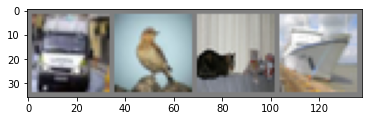

Original Label:  truck  bird   cat  ship


In [19]:
data_iter = iter(test_loader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print("Original Label: ",' '.join('%5s' %classes[labels[j]] for j in range(4)))

In [20]:
model = CIFARmodel()
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [21]:
output = model(images)

C:\Users\shruti\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


the model will return values for each class and we need to find the one with the maximum value to predict the class.

In [23]:
_, predicted = torch.max(output,1)
print('predicted:',' '.join("%5s" %classes[labels[j]]for j in range(4)))

predicted: truck  bird   cat  ship


Accuracy on test set

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
print('Accuracy of the model on test set:', (correct*100)/total)

C:\Users\shruti\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the model on test set: 70.41


Performance of each class

In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = (images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

NameError: name 'net' is not defined